# KL変換の説明用サンプルコード
多次元のベクトルをできるだけ元の情報を失わないように次元を削減しより少ないベクトルで表現しようというもの
2次元から1次元への変換を行うプログラム
まだちゃんと理解できていないです

[[38.1475 27.095 ]
 [27.095  36.09  ]]
[[38.1475  0.    ]
 [ 0.     36.09  ]]


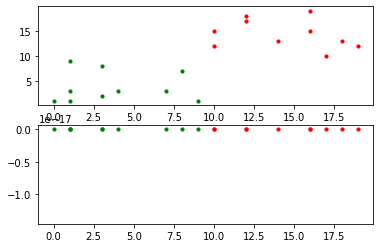

In [3]:
import numpy as np
from matplotlib import pyplot as plt

#testデータ作成
data_x1 =  np.random.randint(low=0, high=10, size=10)
data_y1 = np.random.randint(low=0, high=10, size=10)
data_x2 =  np.random.randint(low=10, high=20, size=10)
data_y2 = np.random.randint(low=10, high=20, size=10)

w1 = np.c_[data_x1,data_y1]
w2 = np.c_[data_x2,data_y2]

w = np.vstack([w1,w2])

#KL展開

sigma = np.zeros([2,2])
#共分散
for i in w:
	sigma += np.dot(np.matrix(i - w.mean(0)).T,np.matrix((i-w.mean(0))))
sigma = sigma/w.shape[0]
print(sigma)
#対角化
tai = np.diag(np.diag(sigma))
print(tai)
#固有値固有ベクトルを出し変換行列の導出
wa,wv = np.linalg.eig(tai)
sort = np.argsort(wa)
A = np.matrix(wv[sort[-1]])

y = np.array([np.dot(A,np.matrix(row).T)for row in w])
#グラフにプロット
plt.subplot(2,1,1)
plt.scatter(data_x1,data_y1,marker='o',color='g',s=10)
plt.scatter(data_x2,data_y2,marker='o',color='r',s=10)

plt.subplot(2,1,2)
plt.scatter(y[:10],np.zeros(10),marker='o',color='g',s=10)
plt.scatter(y[10:],np.zeros(10),marker='o',color='r',s=10)

plt.show()